#Car Price Prediction
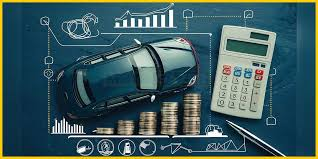

### Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

### Reading the Dataset and get some info

In [2]:
data = pd.read_csv("/content/car details v4.csv")
data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [3]:
data.shape

(2059, 20)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [5]:
data.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


### Handling Nulls and Duplicates

In [6]:
data.duplicated().sum().any()

np.False_

In [7]:
data.isnull().sum()

,0
Make,0
Model,0
Price,0
Year,0
Kilometer,0
Fuel Type,0
Transmission,0
Location,0
Color,0
Owner,0


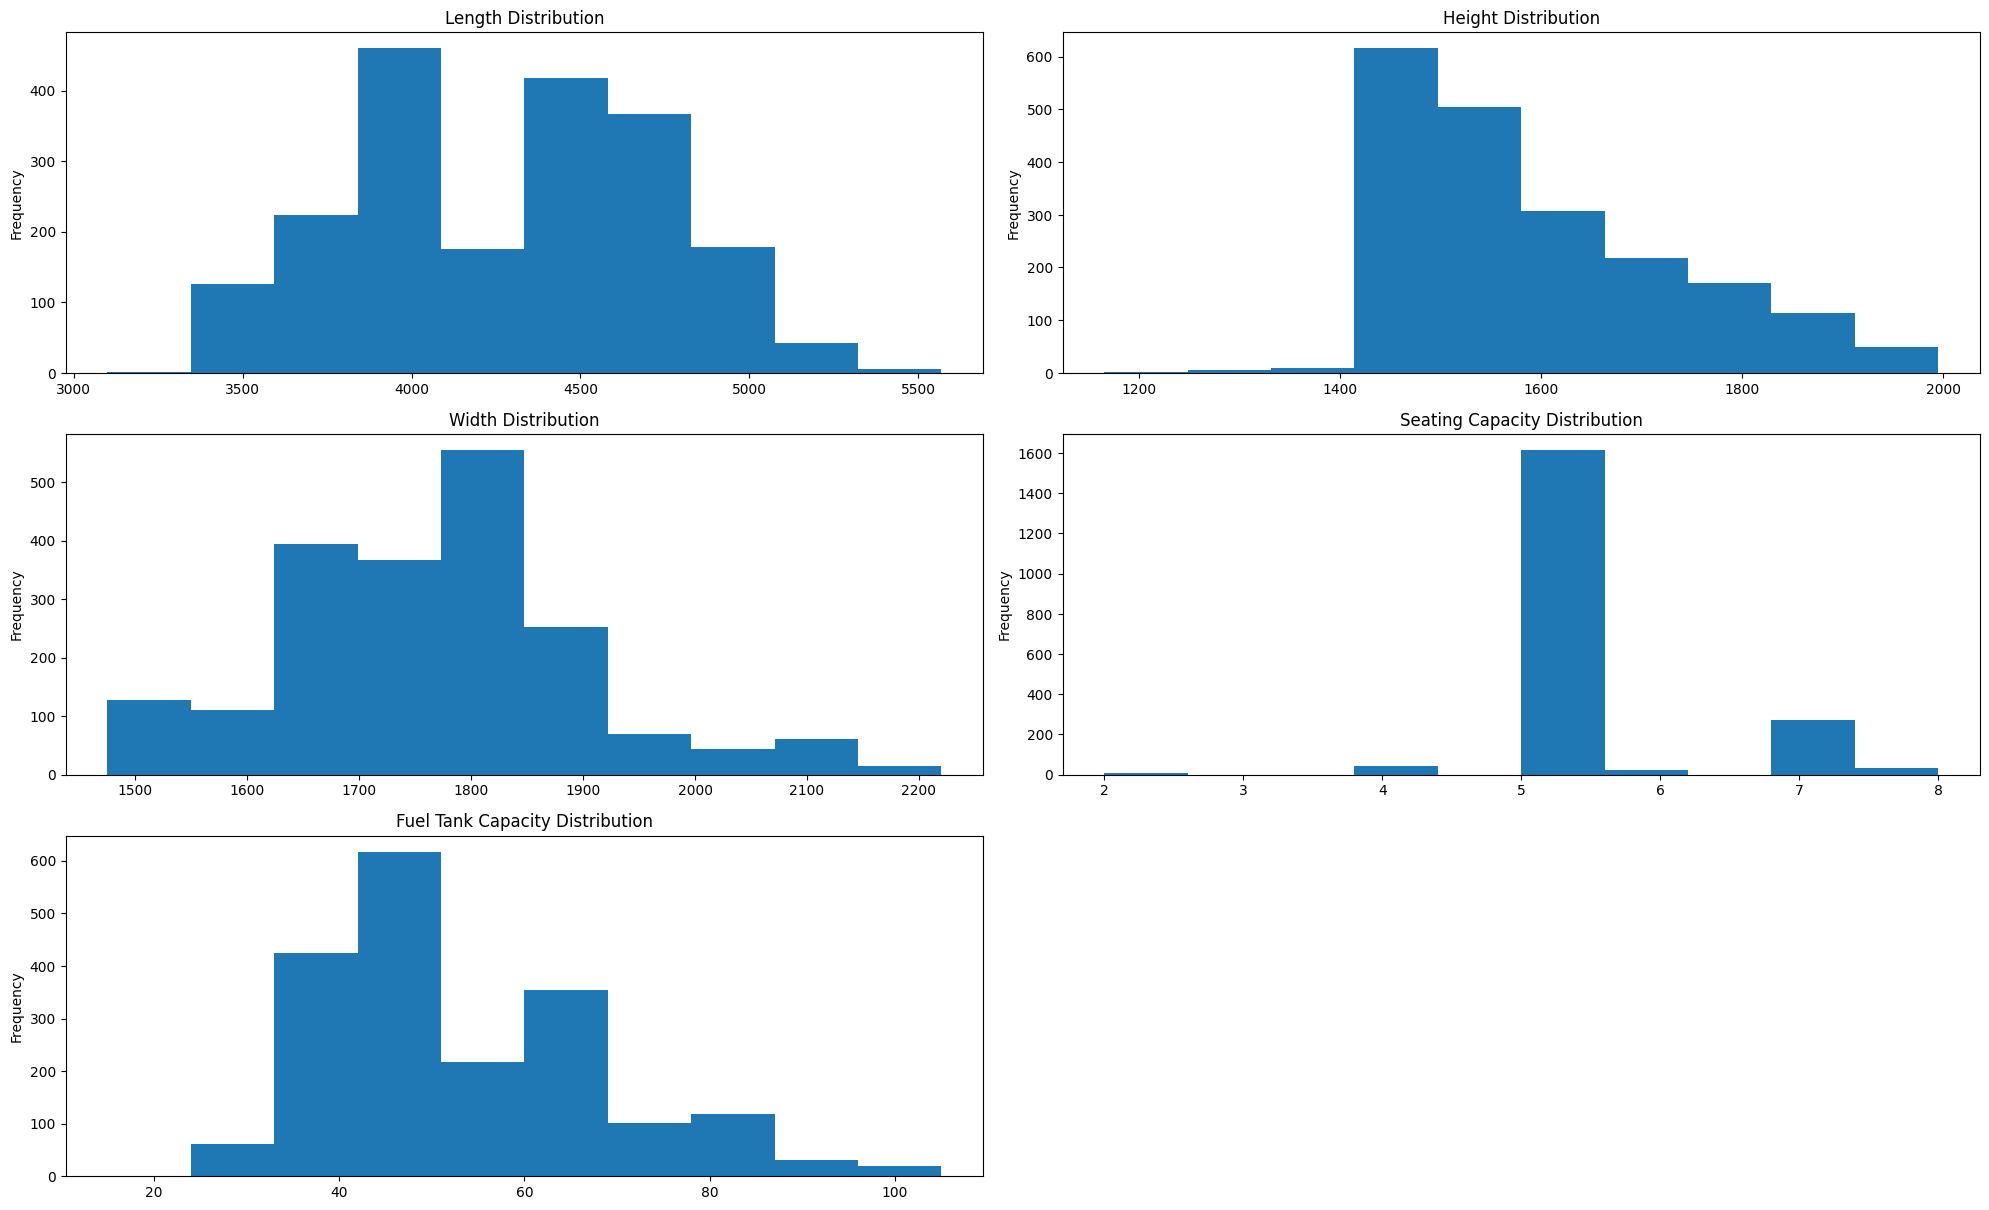

In [8]:
#Visualize the distribution
plt.figure(figsize=(20, 20))
plt.subplot(5, 2, 1)
data['Length'].plot(kind='hist', title='Histogram')
plt.title('Length Distribution')
plt.subplot(5, 2, 2)
data['Height'].plot(kind='hist', title='Histogram')
plt.title('Height Distribution')
plt.subplot(5, 2, 3)
data['Width'].plot(kind='hist', title='Histogram')
plt.title('Width Distribution')
plt.subplot(5, 2, 4)
data['Seating Capacity'].plot(kind='hist', title='Histogram')
plt.title('Seating Capacity Distribution')
plt.subplot(5, 2, 5)
data['Fuel Tank Capacity'].plot(kind='hist', title='Histogram')
plt.title('Fuel Tank Capacity Distribution')
plt.tight_layout()
plt.show()

In [9]:
length_skewness = data['Length'].skew()
height_skewness = data['Height'].skew()
width_skewness = data['Width'].skew()
seating_capacity_skewness = data['Seating Capacity'].skew()
fuel_tank_capacity_skewness = data['Fuel Tank Capacity'].skew()
print(f"length_skewness: {length_skewness:.2f}")
print(f"height_skewness: {height_skewness:.2f}")
print(f"width_skewness: {width_skewness:.2f}")
print(f"seating_capacity_skewness: {seating_capacity_skewness:.2f}")
print(f"fuel_tank_capacity_skewness: {fuel_tank_capacity_skewness:.2f}")

length_skewness: -0.02
height_skewness: 0.84
width_skewness: 0.31
seating_capacity_skewness: 1.47
fuel_tank_capacity_skewness: 0.85


*   For Length and Width, the mean is suitable because their distributions are close to symmetric.  
*   For Height, which has higher skewness, the median is better because:
 It is less affected by outliers (e.g., if some values are unusually large) &
 Ensures the imputed value represents the central tendency better than the mean.
*   seating_capacity and fuel_tank_capacity both columns show significant right skewness (> 0.5), thus the median is suitable.
*   For Categorical features we fill with 'Mode'





In [10]:
data['Length'].fillna(data['Length'].mean(), inplace=True)
data['Width'].fillna(data['Width'].mean(), inplace=True)

data['Height'].fillna(data['Height'].median(), inplace=True)
data['Seating Capacity'].fillna(data['Seating Capacity'].median(), inplace=True)
data['Fuel Tank Capacity'].fillna(data['Fuel Tank Capacity'].median(), inplace=True)

data['Max Power'].fillna(data['Max Power'].mode()[0], inplace=True)
data['Engine'].fillna(data['Engine'].mode()[0], inplace=True)
data['Drivetrain'].fillna(data['Drivetrain'].mode()[0], inplace=True)
data['Max Torque'].fillna(data['Max Torque'].mode()[0], inplace=True)

<ipython-input-10-5352a2aa1687>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Max Power'].fillna(data['Max Power'].mode()[0], inplace=True)
<ipython-input-10-5352a2aa1687>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [11]:
data.isnull().sum().any()

np.False_

### EDA & Data Preprocessing (Numerical Data)

split horsepower (bhp) and RPM and extract Power-to-RPM Ratio: horsepower / rpm

In [12]:
data['Max Power'].head()

,Max Power
0,87 bhp @ 6000 rpm
1,74 bhp @ 4000 rpm
2,79 bhp @ 6000 rpm
3,82 bhp @ 6000 rpm
4,148 bhp @ 3400 rpm


In [13]:
data[['horsepower', 'rpm']] = data['Max Power'].str.extract(r'(\d+)\s*bhp\s*@\s*(\d+)\s*rpm').astype(float)
data['power_per_rpm'] = data['horsepower'] / data['rpm']
data = data.drop(['horsepower', 'rpm', 'Max Power'], axis=1)

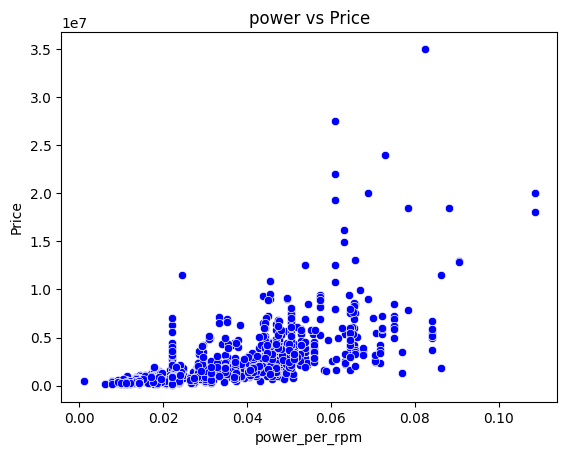

In [14]:
sns.scatterplot(data=data, x="power_per_rpm", y="Price", color = 'blue')
plt.title("power vs Price")
plt.show()

split Torque Newton-meter (Nm) and RPM , then extract Torque-to-RPM Ratio

In [15]:
data['Max Torque'].head()

,Max Torque
0,109 Nm @ 4500 rpm
1,190 Nm @ 2000 rpm
2,112.7619 Nm @ 4000 rpm
3,113 Nm @ 4200 rpm
4,343 Nm @ 1400 rpm


In [16]:
data[['NM', 'rpm']] = data['Max Torque'].str.extract(r'(\d+)\s*Nm\s*@\s*(\d+)\s*rpm').astype(float)
data['torque_per_rpm'] = data['NM'] / data['rpm']
data = data.drop(['NM', 'rpm', 'Max Torque'], axis=1)

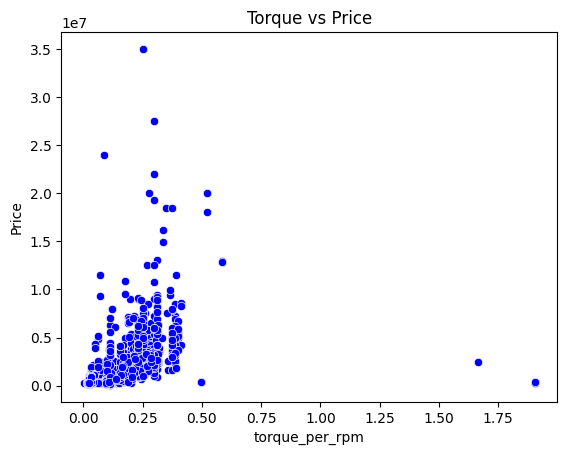

In [17]:
sns.scatterplot(data=data, x="torque_per_rpm", y="Price", color = 'blue')
plt.title("Torque vs Price")
plt.show()

In [18]:
data['torque_per_rpm'].fillna(data['torque_per_rpm'].median(), inplace=True)
data['power_per_rpm'].fillna(data['power_per_rpm'].median(), inplace=True)

<ipython-input-18-831d254770e8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['torque_per_rpm'].fillna(data['torque_per_rpm'].median(), inplace=True)
<ipython-input-18-831d254770e8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [19]:
data.isnull().sum().any()

np.False_

convert Engine from object to number

In [20]:
data['Engine'].head()

,Engine
0,1198 cc
1,1248 cc
2,1197 cc
3,1197 cc
4,2393 cc


In [21]:
data['Engine'] = data['Engine'].str.replace('cc', '').astype(float)

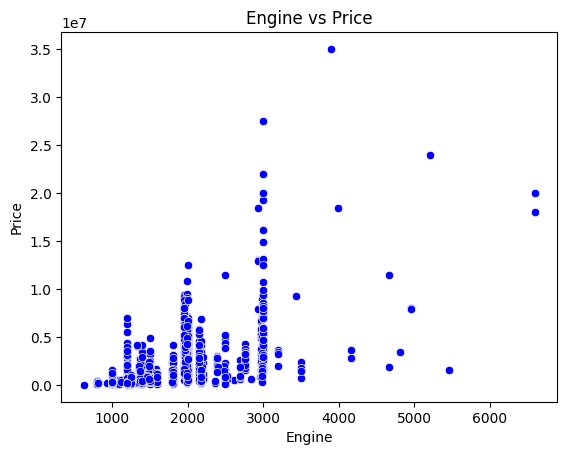

In [22]:
sns.scatterplot(data=data, x="Engine", y="Price", color = 'blue')
plt.title("Engine vs Price")
plt.show()

In [23]:
max_Year = data['Year'].max()
data['Age'] = max_Year - data['Year']
data = data.drop('Year', axis=1)

### Data Visualization

In [24]:
data_num = data.select_dtypes(include=[np.number])
data_cat = data.select_dtypes(exclude=[np.number])

In [25]:
data_num.head()

,Price,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,power_per_rpm,torque_per_rpm,Age
0,505000,87150,1198.0,3990.0,1680.0,1505.0,5.0,35.0,0.014500,0.024222,5
1,450000,75000,1248.0,3995.0,1695.0,1555.0,5.0,42.0,0.018500,0.095000,8
2,220000,67000,1197.0,3585.0,1595.0,1550.0,5.0,35.0,0.013167,1.904750,11
3,799000,37500,1197.0,3995.0,1745.0,1510.0,5.0,37.0,0.013667,0.026905,3
4,1950000,69000,2393.0,4735.0,1830.0,1795.0,7.0,55.0,0.043529,0.245000,4


<Figure size 2000x1000 with 0 Axes>

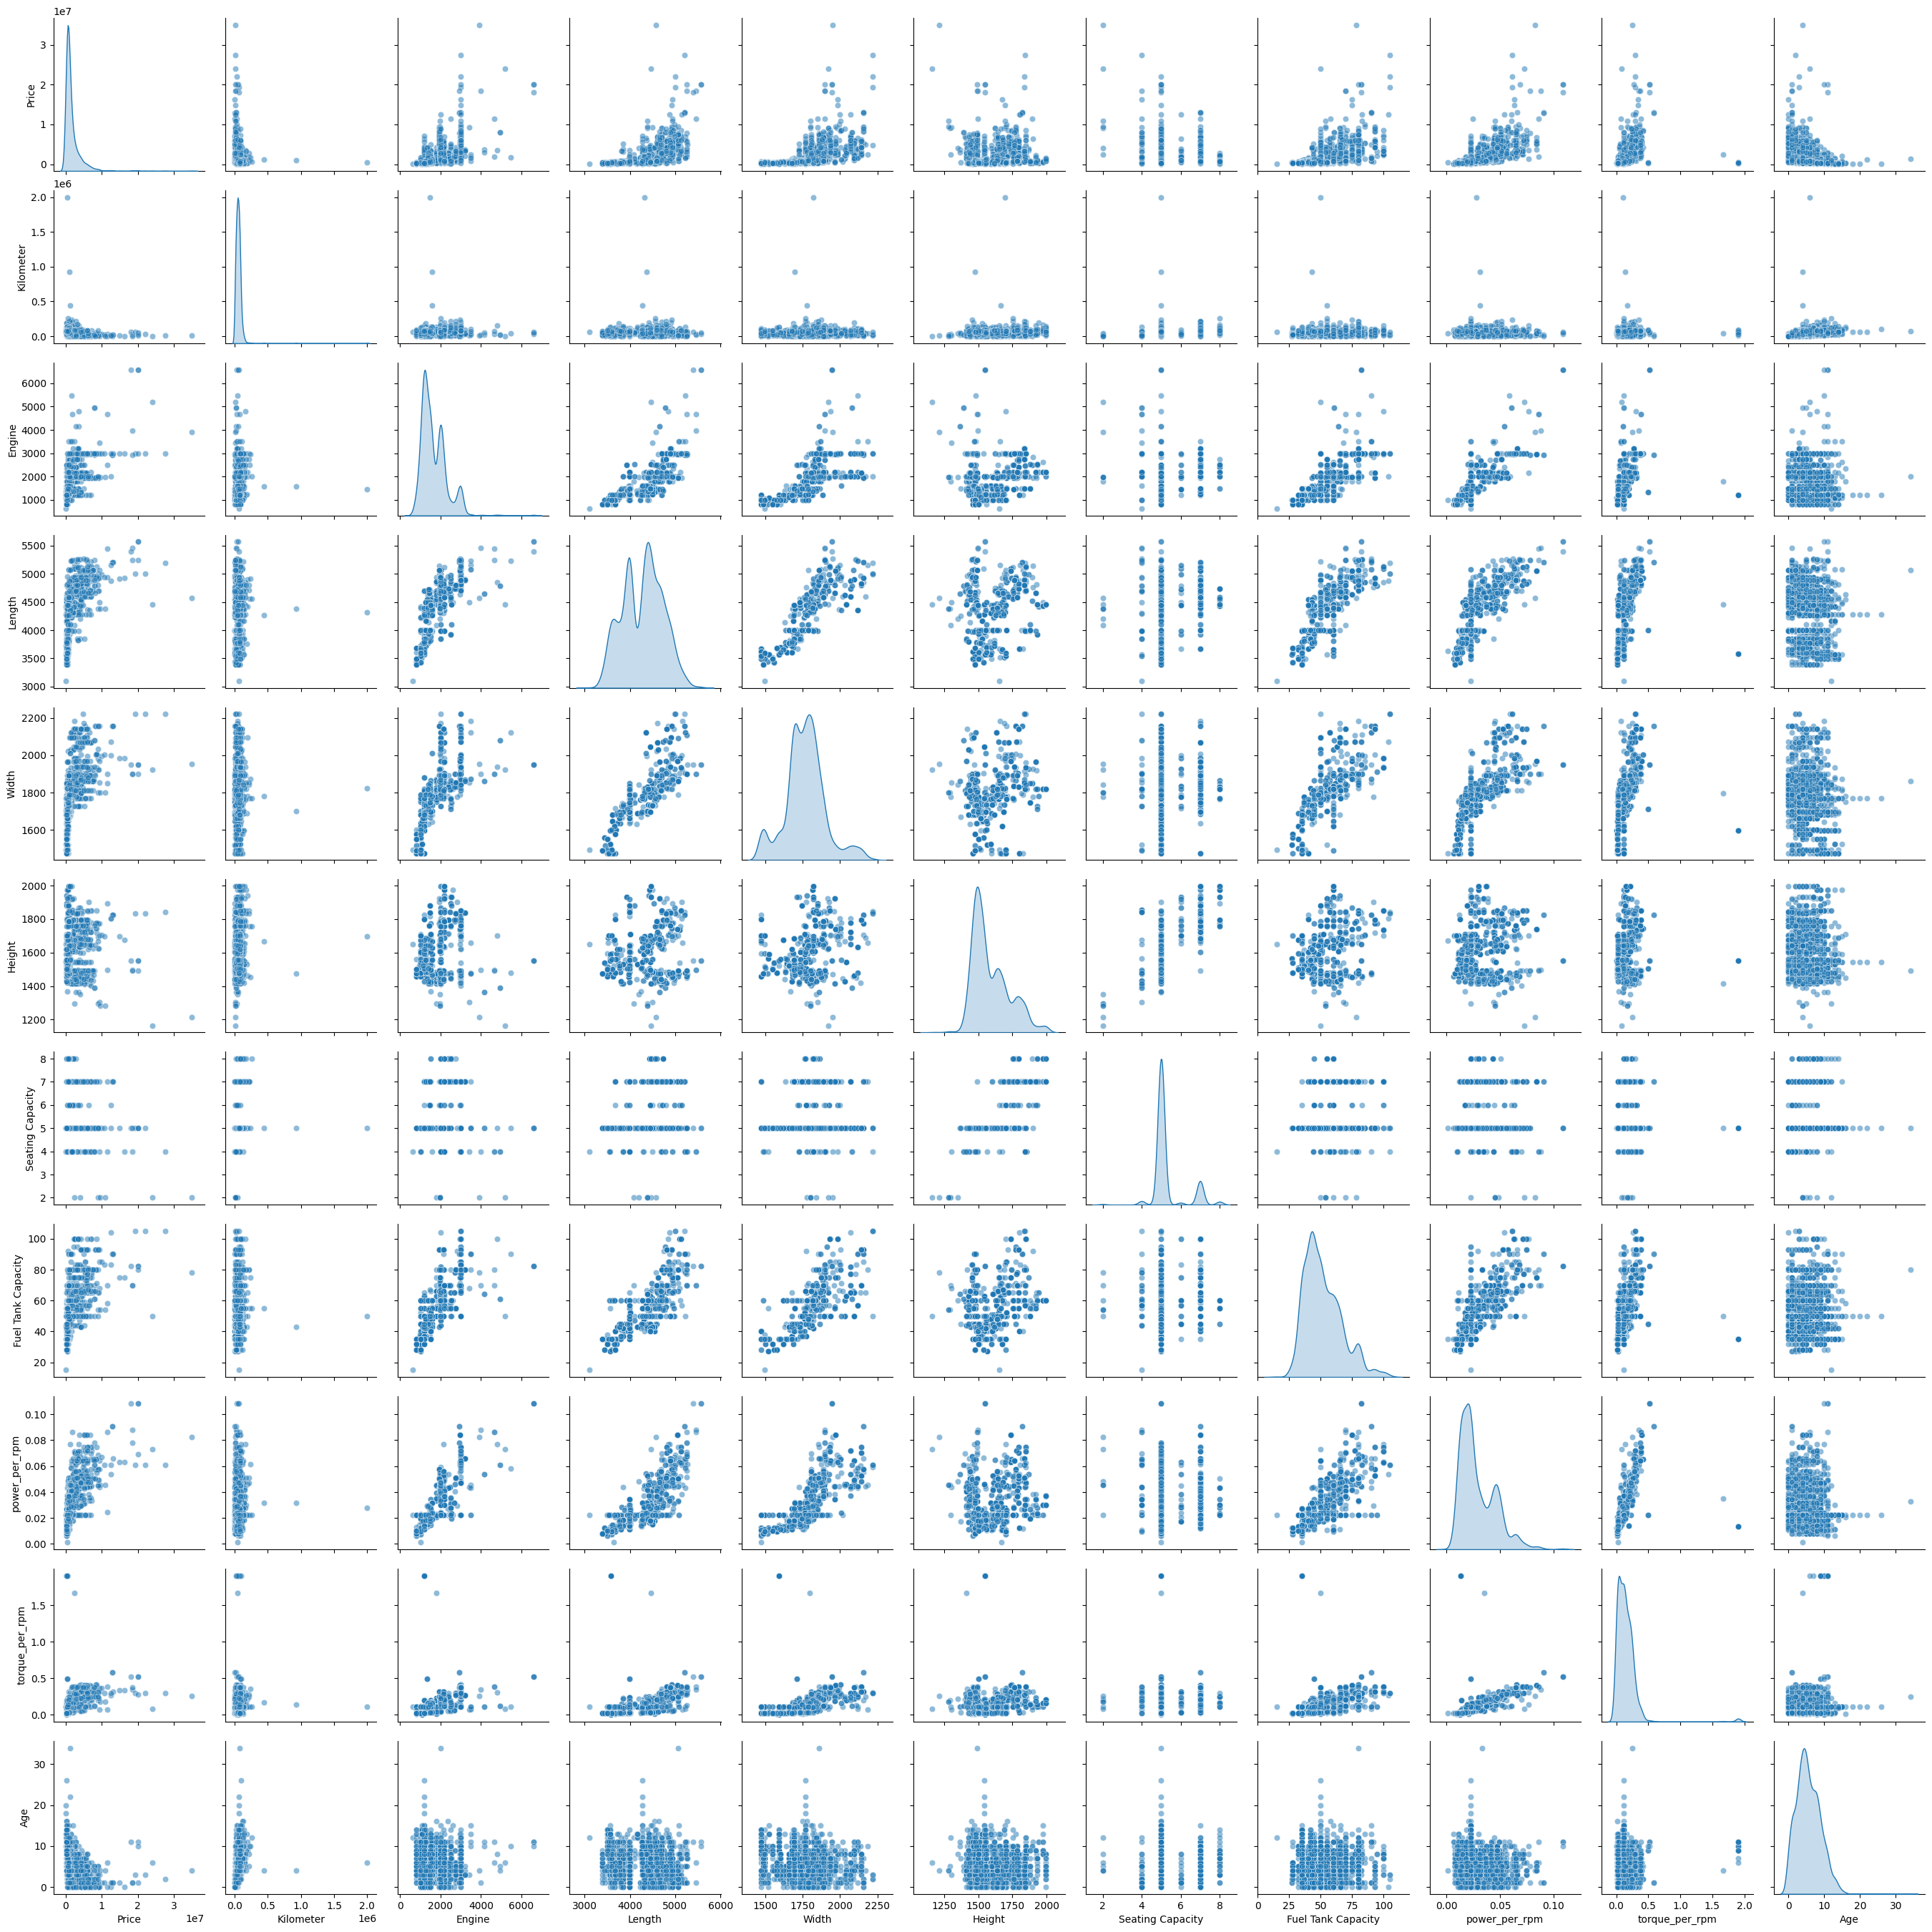

In [26]:
#plotting pairplot
plt.figure(figsize=(20, 10))
sns.pairplot(data_num,
             diag_kind='kde',
             plot_kws={'alpha': 0.5})
plt.show()

<Axes: >

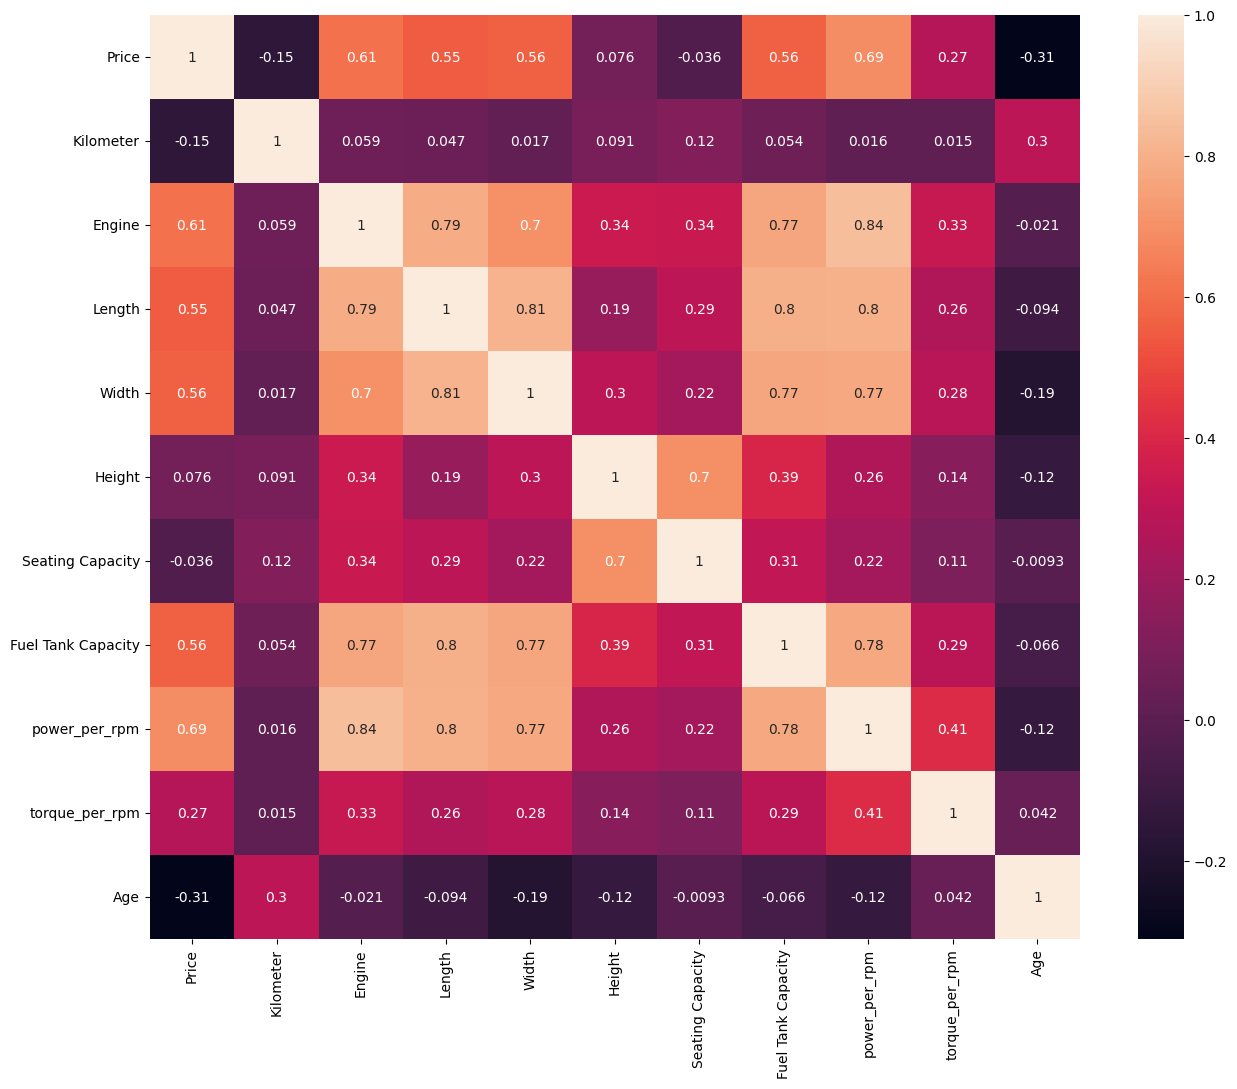

In [27]:
corr = data_num.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True)

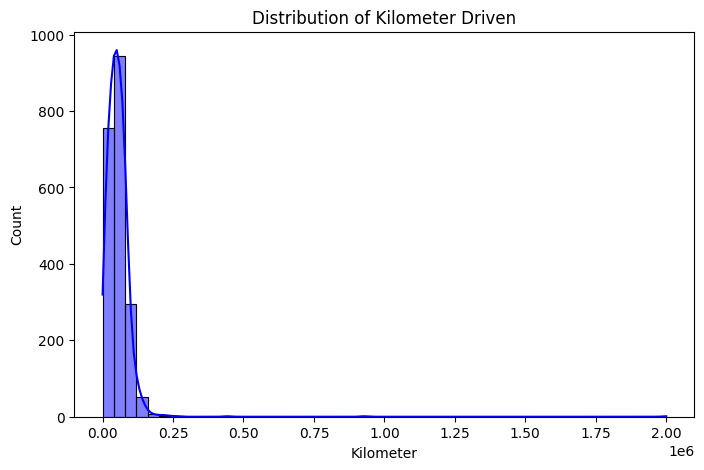

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(data_num['Kilometer'], bins=50, kde=True, color='blue')
plt.title('Distribution of Kilometer Driven')
plt.show()

<Axes: ylabel='count'>

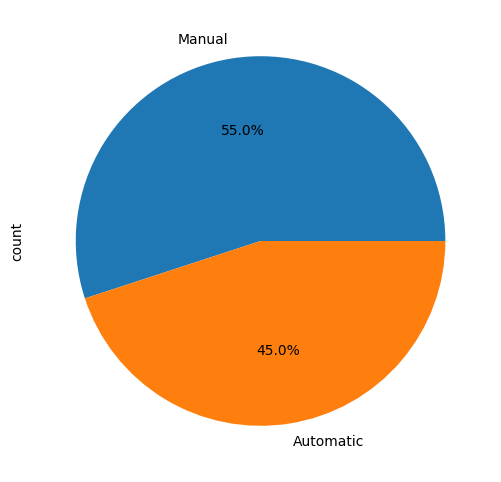

In [29]:
data['Transmission'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))

<Axes: xlabel='Drivetrain'>

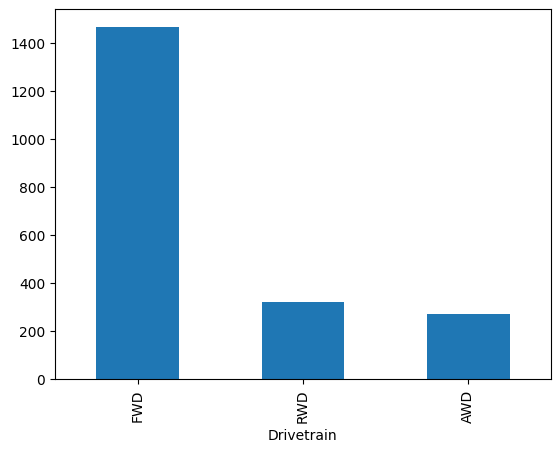

In [30]:
data['Drivetrain'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Color'>

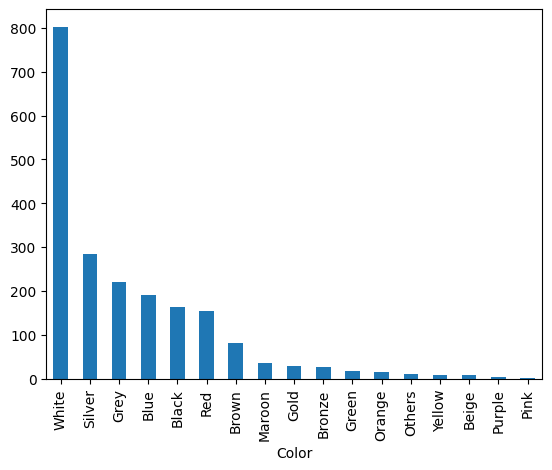

In [31]:
data['Color'].value_counts().plot(kind = 'bar')

<ipython-input-32-83fbb61f8bb3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price', y='Make', data=top_10_expensive, palette='viridis')


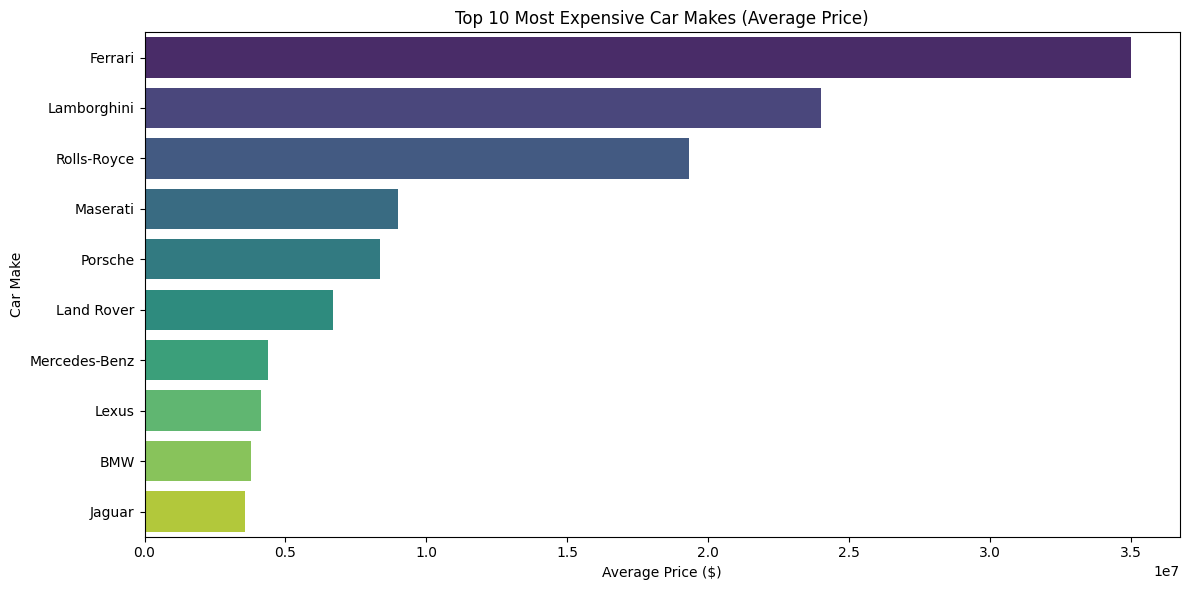

In [32]:
top_10_expensive = data.groupby('Make')['Price'].mean().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Price', y='Make', data=top_10_expensive, palette='viridis')
plt.title('Top 10 Most Expensive Car Makes (Average Price)')
plt.xlabel('Average Price ($)')
plt.ylabel('Car Make')
plt.tight_layout()
plt.show()

<ipython-input-33-6c13e39cd402>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price', y='Make', data=top_10_cheapest, palette='viridis')


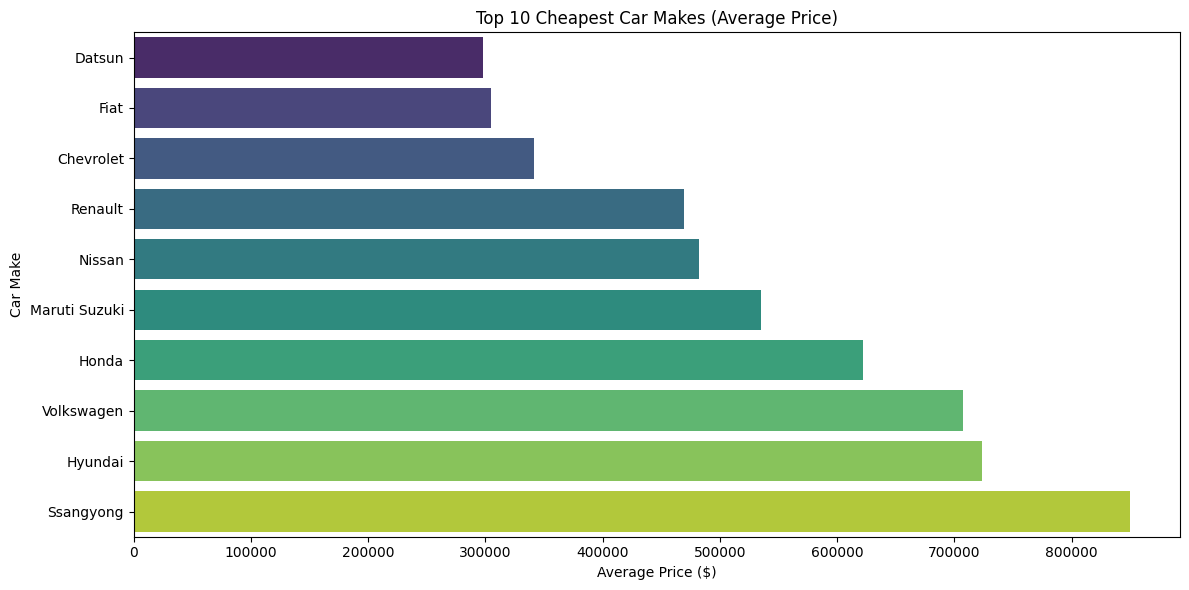

In [33]:
top_10_cheapest = data.groupby('Make')['Price'].mean().nsmallest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Price', y='Make', data=top_10_cheapest, palette='viridis')
plt.title('Top 10 Cheapest Car Makes (Average Price)')
plt.xlabel('Average Price ($)')
plt.ylabel('Car Make')
plt.tight_layout()
plt.show()

### Removing Outliers with IQR

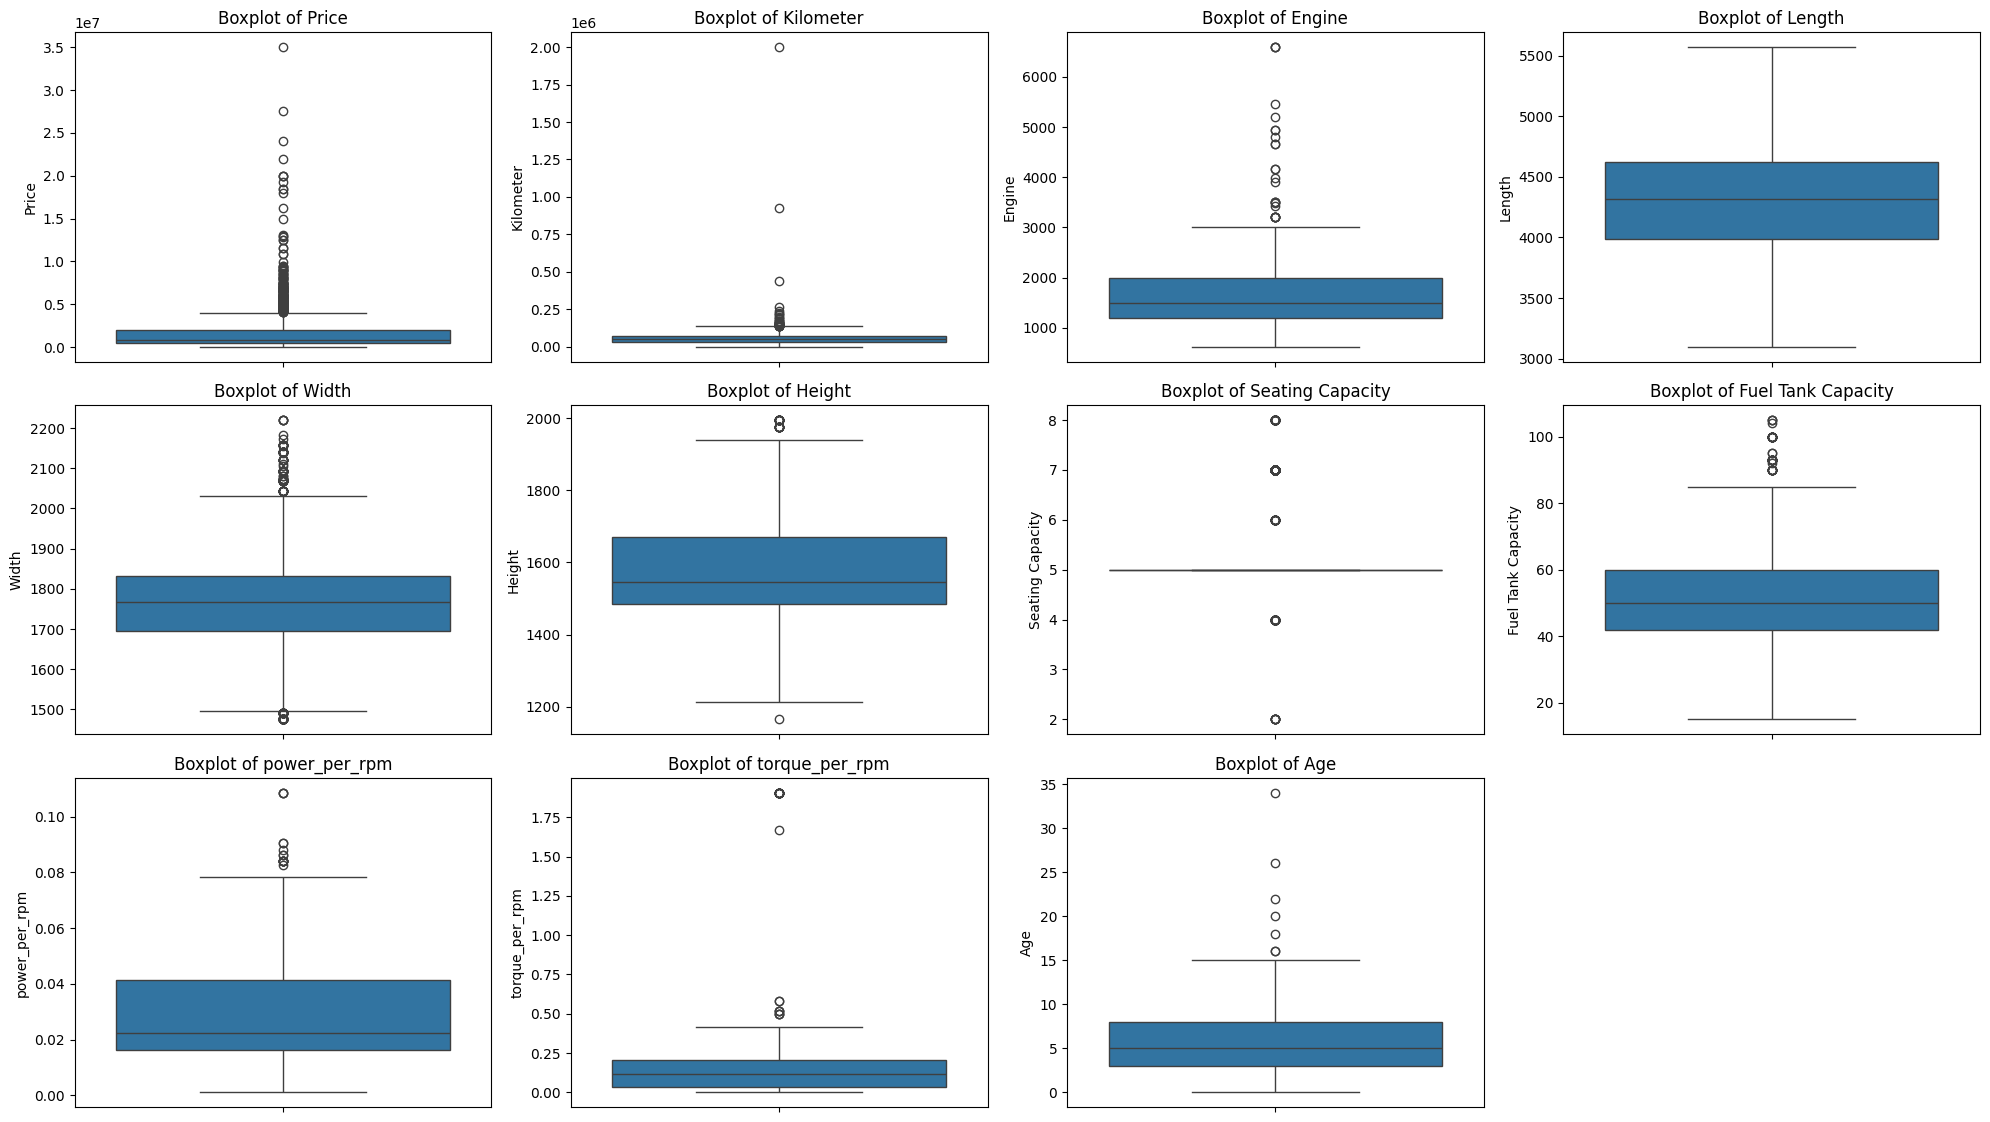

In [34]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(data_num, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data_num[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [35]:
for feature in data_num:
    q1 = data_num[feature].quantile(0.25)
    q3 = data_num[feature].quantile(0.75)
    iqr = q3 - q1
    outliers = data_num[(data_num[feature] < (q1 - 1.5*iqr)) | (data_num[feature] > (q3 + 1.5*iqr))]
    print(f"{feature}: {len(outliers)} outliers")
    data_num = data_num.drop(outliers.index)
    data_cat = data_cat.drop(outliers.index)
    print(f"Removed {len(outliers)} outliers from {feature}")

Price: 215 outliers
Removed 215 outliers from Price
Kilometer: 40 outliers
Removed 40 outliers from Kilometer
Engine: 14 outliers
Removed 14 outliers from Engine
Length: 6 outliers
Removed 6 outliers from Length
Width: 163 outliers
Removed 163 outliers from Width
Height: 57 outliers
Removed 57 outliers from Height
Seating Capacity: 229 outliers
Removed 229 outliers from Seating Capacity
Fuel Tank Capacity: 37 outliers
Removed 37 outliers from Fuel Tank Capacity
power_per_rpm: 27 outliers
Removed 27 outliers from power_per_rpm
torque_per_rpm: 20 outliers
Removed 20 outliers from torque_per_rpm
Age: 6 outliers
Removed 6 outliers from Age


In [36]:
data_num.shape

(1245, 11)

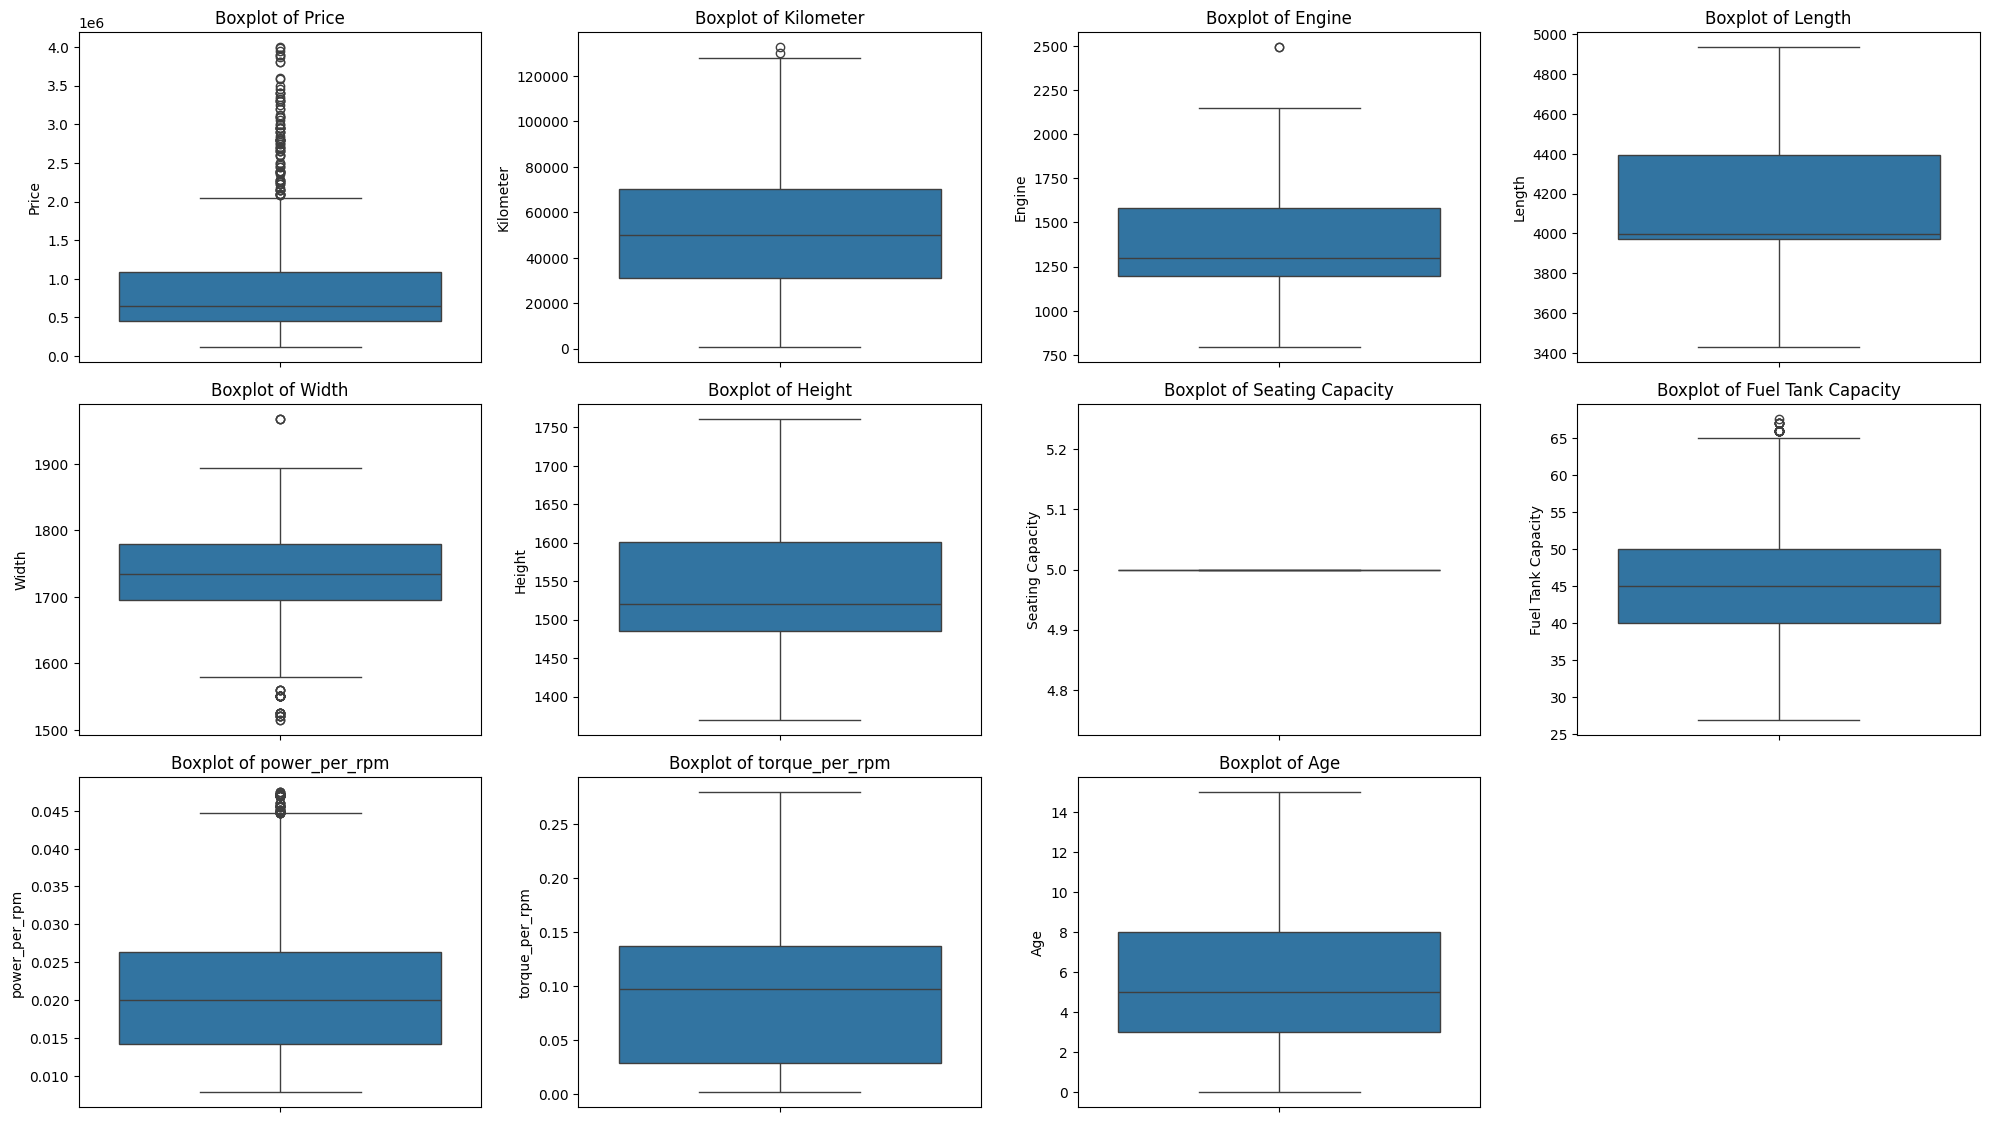

In [37]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(data_num, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data_num[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

### EDA & Data Preprocessing (Categorical Data)

Too many unique names of car model can affect model performance , so we better drop "Model" column

In [38]:
data_cat['Model'].value_counts()

,count
Model,
Swift DZire VDI,14
City V,13
Swift VXi,12
Swift DZire VXI,12
Swift VXi [2014-2017],12
...,...
Accord 2.4 iVtec AT,1
Creta SX (O) 1.5 Diesel Automatic,1
Compass Limited (O) 1.4 Petrol DCT,1


In [39]:
data_cat = data_cat.drop('Model', axis=1)

Group infrequent features categories into an "Other" category.

In [40]:
data_cat['Fuel Type'].value_counts()

,count
Fuel Type,
Petrol,717
Diesel,504
CNG,14
Electric,7
LPG,2
Petrol + CNG,1


In [41]:
name_counts = data_cat["Fuel Type"].value_counts()
data_cat["Fuel Type"] = data_cat["Fuel Type"].apply(lambda x: x if name_counts[x] > 50 else "Other")

In [42]:
len(data['Color'].unique())

17

In [43]:
data['Color'].value_counts()

,count
Color,
White,802
Silver,285
Grey,220
Blue,190
Black,163
Red,154
Brown,82
Maroon,37
Gold,30


In [44]:
name_counts = data_cat["Color"].value_counts()
data_cat["Color"] = data_cat["Color"].apply(lambda x: x if name_counts[x] > 30 else "Other")

In [45]:
data_cat['Owner'].value_counts()

,count
Owner,
First,1016
Second,201
Third,21
UnRegistered Car,5
Fourth,1
4 or More,1


In [46]:
name_counts = data_cat["Owner"].value_counts()
data_cat["Owner"] = data_cat["Owner"].apply(lambda x: x if name_counts[x] > 30 else "Other")

In [47]:
data_cat['Seller Type'].value_counts()

,count
Seller Type,
Individual,1210
Corporate,32
Commercial Registration,3


In [48]:
name_counts = data_cat["Seller Type"].value_counts()
data_cat["Seller Type"] = data_cat["Seller Type"].apply(lambda x: x if name_counts[x] > 100 else "Other")

 As seen below 'Make' has 33 unique values, which can be considered as a High-Cardinality Categorical, so we can handle this by using Target Encoding (Mean Encoding), which mean replacing 'Make' categories with the mean of the target 'Price' variable for each group.

In [49]:
data_cat['Make'].unique()
print(len(data_cat['Make'].unique()))

25


In [50]:
data_cat['Make'].value_counts()

,count
Make,
Hyundai,313
Maruti Suzuki,295
Honda,150
Audi,72
Volkswagen,47
Renault,42
Tata,42
Toyota,39
Skoda,35


In [51]:
mean_price_by_make = data.groupby('Make')['Price'].mean().to_dict()
data_cat['mean_price_by_make'] = data_cat['Make'].map(mean_price_by_make)

In [52]:
data_cat = data_cat.drop('Make', axis=1)

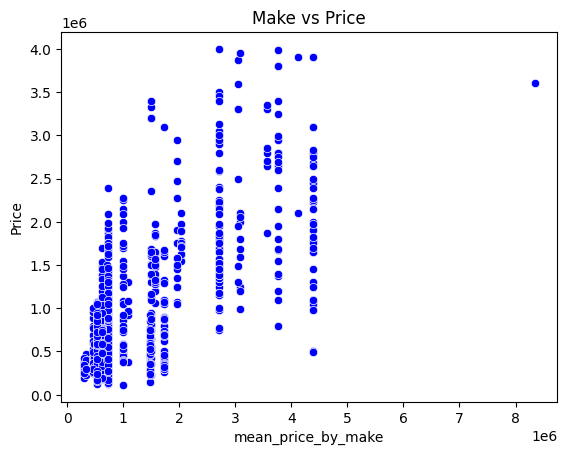

In [53]:
sns.scatterplot(data=data_cat, x="mean_price_by_make", y=data["Price"], color = 'blue')
plt.title("Make vs Price")
plt.show()

Target Encoding 'Location'

In [54]:
print(len(data_cat['Location'].unique()))

71


In [55]:
mean_location = data.groupby('Location')['Price'].mean().to_dict()
data_cat['mean_location'] = data_cat['Location'].map(mean_location)

In [56]:
data_cat = data_cat.drop('Location', axis = 1)

*   Ordinal Encoding (for ordinal categories)
*   One-Hot Encoding (for non-ordinal categories)

In [57]:
data_cat.head()

,Fuel Type,Transmission,Color,Owner,Seller Type,Drivetrain,mean_price_by_make,mean_location
0,Petrol,Manual,Grey,First,Other,FWD,6.221076e+05,1.977764e+06
1,Diesel,Manual,White,Second,Individual,FWD,5.348000e+05,1.475745e+06
3,Petrol,Manual,Red,First,Individual,FWD,1.729545e+06,7.424000e+05
5,Petrol,Manual,Grey,First,Individual,FWD,5.348000e+05,1.977764e+06
6,Petrol,Automatic,White,Second,Individual,FWD,4.384860e+06,1.721570e+06


In [58]:
Fuel_Type_Encoded = pd.get_dummies(data_cat['Fuel Type'], prefix='Fuel_Type', drop_first=True).astype(int)
Fuel_Type_Encoded.head()

,Fuel_Type_Other,Fuel_Type_Petrol
0,0,1
1,0,0
3,0,1
5,0,1
6,0,1


In [59]:
data_cat = pd.concat([data_cat, Fuel_Type_Encoded], axis=1)
data_cat = data_cat.drop('Fuel Type', axis=1)

In [60]:
Transmission_Encoded = pd.get_dummies(data_cat['Transmission'], prefix='Transmission', drop_first=True).astype(int)
Transmission_Encoded.head()

,Transmission_Manual
0,1
1,1
3,1
5,1
6,0


In [61]:
data_cat = pd.concat([data_cat, Transmission_Encoded], axis=1)
data_cat = data_cat.drop('Transmission', axis=1)

In [62]:
Color_Encoded = pd.get_dummies(data_cat['Color'], prefix='Color', drop_first=True).astype(int)
Color_Encoded.head()

,Color_Blue,Color_Brown,Color_Grey,Color_Other,Color_Red,Color_Silver,Color_White
0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
5,0,0,1,0,0,0,0
6,0,0,0,0,0,0,1


In [63]:
data_cat = pd.concat([data_cat, Color_Encoded], axis=1)
data_cat = data_cat.drop('Color', axis=1)

In [64]:
data_cat['Owner'].unique()

array(['First', 'Second', 'Other'], dtype=object)

In [65]:
Owener_map = {'First': 1, 'Second': 2, 'Third': 3, 'Other': 4}
data_cat['Owner'] = data_cat['Owner'].map(Owener_map)

In [66]:
data_cat['Owner'].unique()

array([1, 2, 4])

In [67]:
Seller_Type_Encoded = pd.get_dummies(data_cat['Seller Type'], prefix='Seller_Type', drop_first=True).astype(int)
Seller_Type_Encoded.head()

,Seller_Type_Other
0,1
1,0
3,0
5,0
6,0


In [68]:
data_cat = pd.concat([data_cat, Seller_Type_Encoded], axis=1)
data_cat = data_cat.drop('Seller Type', axis=1)

In [69]:
Drivetrain_encoded = pd.get_dummies(data_cat['Drivetrain'], prefix='Drivetrain', drop_first=True).astype(int)
Drivetrain_encoded.head()

,Drivetrain_FWD,Drivetrain_RWD
0,1,0
1,1,0
3,1,0
5,1,0
6,1,0


In [70]:
data_cat = pd.concat([data_cat, Drivetrain_encoded], axis=1)
data_cat = data_cat.drop('Drivetrain', axis=1)

In [71]:
data_cat.head()

,Owner,mean_price_by_make,mean_location,Fuel_Type_Other,Fuel_Type_Petrol,Transmission_Manual,Color_Blue,Color_Brown,Color_Grey,Color_Other,Color_Red,Color_Silver,Color_White,Seller_Type_Other,Drivetrain_FWD,Drivetrain_RWD
0,1,6.221076e+05,1.977764e+06,0,1,1,0,0,1,0,0,0,0,1,1,0
1,2,5.348000e+05,1.475745e+06,0,0,1,0,0,0,0,0,0,1,0,1,0
3,1,1.729545e+06,7.424000e+05,0,1,1,0,0,0,0,1,0,0,0,1,0
5,1,5.348000e+05,1.977764e+06,0,1,1,0,0,1,0,0,0,0,0,1,0
6,2,4.384860e+06,1.721570e+06,0,1,0,0,0,0,0,0,0,1,0,1,0


In [72]:
data_num['mean_price_by_make'] = data_cat.pop('mean_price_by_make')
data_num['mean_location'] = data_cat.pop('mean_location')
data_num['Owner'] = data_cat.pop('Owner')

In [73]:
data_cat.head()

,Fuel_Type_Other,Fuel_Type_Petrol,Transmission_Manual,Color_Blue,Color_Brown,Color_Grey,Color_Other,Color_Red,Color_Silver,Color_White,Seller_Type_Other,Drivetrain_FWD,Drivetrain_RWD
0,0,1,1,0,0,1,0,0,0,0,1,1,0
1,0,0,1,0,0,0,0,0,0,1,0,1,0
3,0,1,1,0,0,0,0,1,0,0,0,1,0
5,0,1,1,0,0,1,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0,0,0,1,0,1,0


In [74]:
data_num.head()

,Price,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,power_per_rpm,torque_per_rpm,Age,mean_price_by_make,mean_location,Owner
0,505000,87150,1198.0,3990.0,1680.0,1505.0,5.0,35.0,0.014500,0.024222,5,6.221076e+05,1.977764e+06,1
1,450000,75000,1248.0,3995.0,1695.0,1555.0,5.0,42.0,0.018500,0.095000,8,5.348000e+05,1.475745e+06,2
3,799000,37500,1197.0,3995.0,1745.0,1510.0,5.0,37.0,0.013667,0.026905,3,1.729545e+06,7.424000e+05,1
5,675000,73315,1373.0,4490.0,1730.0,1485.0,5.0,43.0,0.015167,0.032500,5,5.348000e+05,1.977764e+06,1
6,1898999,47000,1991.0,4630.0,1777.0,1432.0,5.0,50.0,0.032909,0.250000,7,4.384860e+06,1.721570e+06,2


In [75]:
data_num['Seating Capacity'].value_counts()

,count
Seating Capacity,
5.0,1245


In [76]:
data_num = data_num.drop('Seating Capacity', axis=1)

### Normalizing the Data

In [77]:
X_num = data_num.drop('Price', axis=1)  # Numerical features without target
y = data_num['Price']  # Target variable

In [78]:
scaler = MinMaxScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num),
                          columns=X_num.columns,
                          index=X_num.index)

### Splitting the data

In [79]:
X_final = pd.concat([X_num_scaled, data_cat], axis=1)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

### Models Training

Random Forest

In [81]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [82]:
y_pred = rf.predict(X_test)

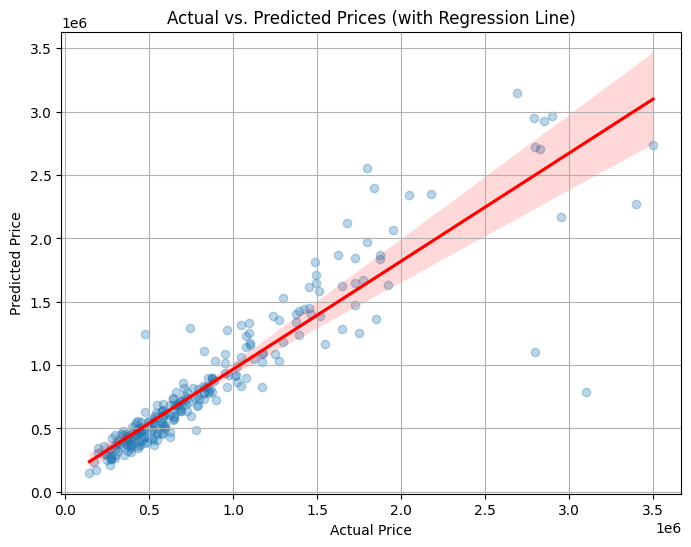

In [83]:
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (with Regression Line)')
plt.grid(True)
plt.show()

In [84]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R-squared: 0.84
Mean Squared Error: 65172072194.21
